# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [4]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
# Create a new dataframe from your CSV
Movie_data_df = pd.read_csv('IMDB-Movie-Data.csv')
Movie_data_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
# Print out any information you need to understand your dataframe
Movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

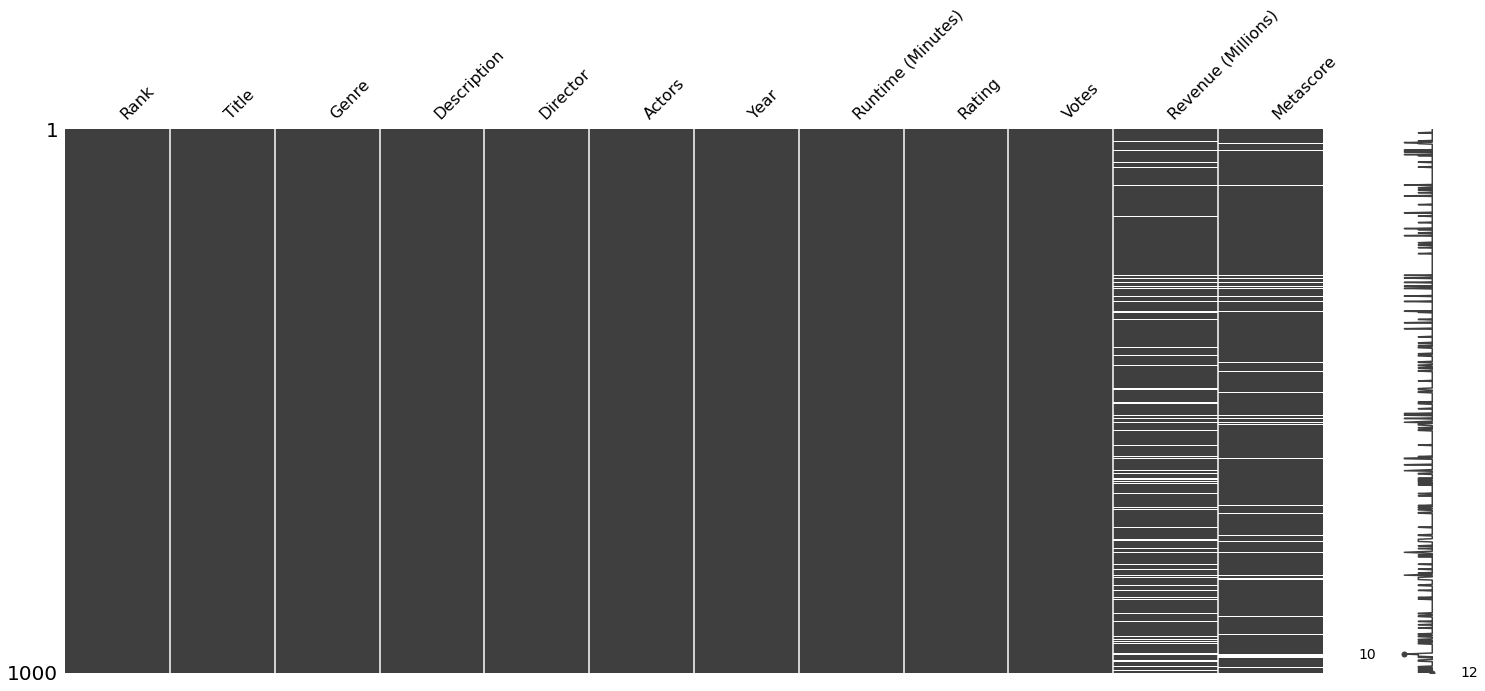

In [6]:
# Plot a heatmap of any missing data
import missingno as msno
msno.matrix(Movie_data_df)

In [11]:
# Try out a missing data percentage list! 
missing_data_pct = Movie_data_df.isna().mean()
missing_data_pct

Rank                  0.000
Title                 0.000
Genre                 0.000
Description           0.000
Director              0.000
Actors                0.000
Year                  0.000
Runtime (Minutes)     0.000
Rating                0.000
Votes                 0.000
Revenue (Millions)    0.128
Metascore             0.064
dtype: float64

<AxesSubplot:>

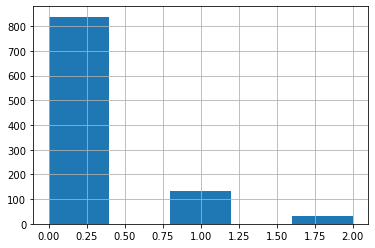

In [17]:
# Plot a missing data histogram
missing_data_row = Movie_data_df.isna().sum(axis="columns")
missing_data_row.hist(bins = 5)

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [31]:
# Handle any missing data in your dataframe.
Movie_data_df_copy = Movie_data_df.copy()
med = Movie_data_df_copy[['Revenue (Millions)','Metascore']].median()
Movie_data_df_copy[['Revenue (Millions)','Metascore']] = Movie_data_df_copy[['Revenue (Millions)','Metascore']].fillna(med)
Movie_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

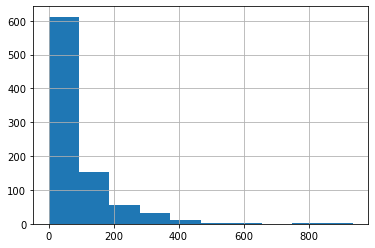

In [34]:
# Plot a histogram to see if there are any outliers.
Movie_data_df['Revenue (Millions)'].hist(bins = 10)



In [35]:
# Use the describe() method
Movie_data_df['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

<AxesSubplot:>

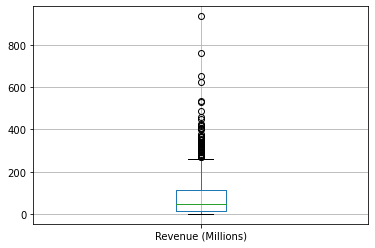

In [47]:
# Plot a bar chart
Movie_data_df.boxplot(column=['Revenue (Millions)'])
#Movie_data_df['Genre'].value_counts().plot(kind = 'bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [53]:
# Handle any outliers in your dataframe
movie_data_outliner_copy = Movie_data_df.copy()
revenue_median = movie_data_outliner_copy [['Revenue (Millions)']].median()
movie_data_outliner_copy.loc[movie_data_outliner_copy['Revenue (Millions)']> 800, 'Revenue (Millions)'] = revenue_median
movie_data_outliner_copy['Revenue (Millions)'].describe()


count    871.000000
mean      81.976269
std       99.171229
min        0.000000
25%       13.240000
50%       47.950000
75%      113.440000
max      760.510000
Name: Revenue (Millions), dtype: float64

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [74]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(Movie_data_df)
for col in Movie_data_df.columns:
    cnts = Movie_data_df[col].value_counts(dropna=True)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct)
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()


0.001
0.002
0.05
0.001
0.008
0.002
0.297
0.031
0.052
0.002
0.007
0.025


In [76]:
#How will you handle it?
#This data set does not have any irrelevent data set.

In [83]:
# Look for duplicates. How will you handle any duplicates?
Movie_data_df[Movie_data_df.duplicated()]

Movie_data_df.drop_duplicates()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [85]:
# Think about what data in the dataframe may be uninformative.
# If we are looking information on revenues for movies per year then features like Rating, Runtime, votes etc would become uninformative.

#Make note here of what situations may render data uninformative and how you would handle it?
#We need to drop the uninformative columns by using .drop method


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [96]:
# Try to convert all the strings in a column to lower or upper case.
Movie_data_df['Title'] = Movie_data_df['Title'].str.upper()
Movie_data_df['Title']

0      GUARDIANS OF THE GALAXY
1                   PROMETHEUS
2                        SPLIT
3                         SING
4                SUICIDE SQUAD
                ...           
995       SECRET IN THEIR EYES
996            HOSTEL: PART II
997     STEP UP 2: THE STREETS
998               SEARCH PARTY
999                 NINE LIVES
Name: Title, Length: 1000, dtype: object